In [26]:
'''Imports'''
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits, fetch_california_housing



In [27]:
'''Configure Utilities'''
np.set_printoptions(suppress=True, precision=5)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [33]:
'''Load Data'''

coastline_shp = './geoData/califorina_pacific_coast-shapefile/3853-s3_2002_s3_reg_pacific_ocean.shp'
places_shp = './geoData/ca_places/CA_Places.shp'
counties_shp = './geoData/us_county/tl_2023_us_county.shp'
# counties_shp = './geoData/ca_counties/CA_Counties.shp'

coastline = gpd.read_file(coastline_shp)
places = gpd.read_file(places_shp)
counties = gpd.read_file(counties_shp)

rawData = fetch_california_housing(as_frame=True).data
cal_housing_geo = gpd.GeoDataFrame(rawData, geometry=gpd.points_from_xy(rawData.Longitude, rawData.Latitude), crs=counties.crs)


In [34]:
'''Standardize Cordinate Projection'''
coastline = coastline.to_crs(counties.crs)
places = places.to_crs(counties.crs)
counties = counties.to_crs(counties.crs)
print(coastline.crs)
print(counties.crs)
print(places.crs)
print(cal_housing_geo.crs)

EPSG:4269
EPSG:4269
EPSG:4269
EPSG:4269


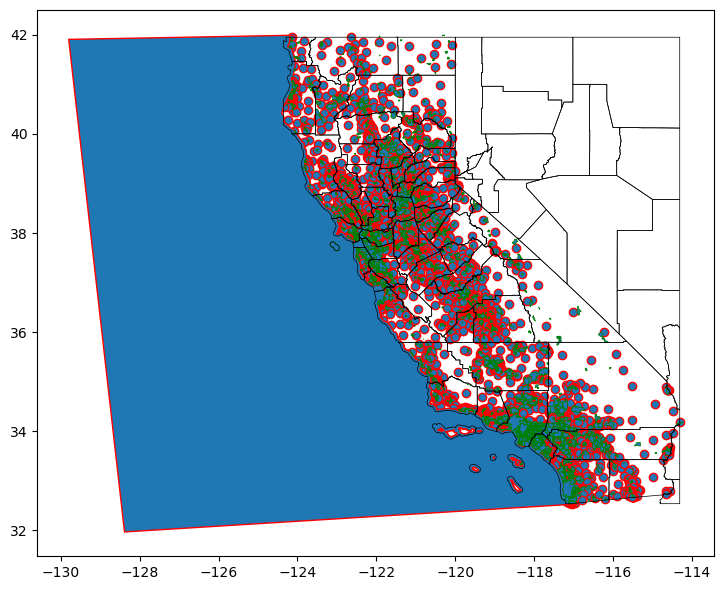

In [35]:
'''Set geo bounding box and plot'''
# print(cal_housing_geo.total_bounds)
housing_bounds = cal_housing_geo.total_bounds
counties = counties.clip(housing_bounds)
fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)

counties.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
cal_housing_geo.plot(ax=ax, edgecolor='red', linewidth=1.0)
coastline.plot(ax=ax, edgecolor='red', linewidth=1.0)
places.plot(ax=ax, edgecolor='green', linewidth=0.5)
plt.show()



In [6]:
'''Feature Engineer Distance from Coast'''
points = cal_housing_geo.to_crs("EPSG:5069")
coast = coastline.to_crs("EPSG:5069")
house_to_coast = gpd.sjoin_nearest(points, coast, how="left", distance_col="meters")
cal_housing_geo['m_to_coast'] = house_to_coast['meters']



In [7]:
'''Feature Engineer Distance from Place of Interest'''

points = cal_housing_geo.to_crs("EPSG:5069")
places_of_interest = places.to_crs("EPSG:5069")
house_to_interest = gpd.sjoin_nearest(points, places_of_interest, how="left", distance_col="meters")
cal_housing_geo['m_to_interest'] = house_to_interest['meters']
